In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# To change the background of ID Photo

In [5]:
def my_show(img, size=(3,3)):
    plt.figure(figsize=size)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()

In [6]:
def my_show_HSV(img, size=(3,3)):
    plt.figure(figsize=size)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_HSV2RGB))
    plt.show()

In [7]:
def my_show_gray(img, size=(3,3)):
    plt.figure(figsize=size)
    plt.imshow(img,cmap='gray')
    plt.show()

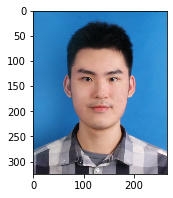

In [9]:
img=cv2.imread('Herman.jpg')
rows,cols,channels = img.shape
img=cv2.resize(img,None,fx=0.5,fy=0.5)
rows,cols,channels = img.shape
my_show(img)

# Mask creation, fixed with dilation and erosion

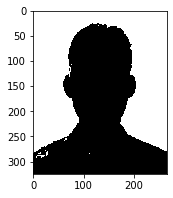

In [10]:
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
lower_blue=np.array([78,43,46])
upper_blue=np.array([110,255,255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
my_show_gray(mask)

In [11]:
print('mask.shape: ',mask.shape)
print('mask: ',mask)
# mask is only 2D, value is 255 or 0

mask.shape:  (325, 266)
mask:  [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [12]:
num = 1 # choose number of iterations
def fix(mask,iteration,depth):
    for i in range (0,num+1):
        mask=cv2.erode(mask,None,iterations=depth)
        #erode=cv2.erode(mask,None,iterations=1)
        #cv2.imshow('erode',erode)
        mask=cv2.dilate(mask,None,iterations=depth)
        #dilate=cv2.dilate(erode,None,iterations=1)
        #cv2.imshow('dilate',dilate)
    return mask

In [13]:
fixed_mask = fix(mask,1,3)
fixed_mask.shape

(325, 266)

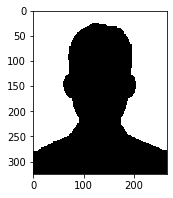

In [18]:
fixed_mask = fix(mask,2,5)
my_show_gray(fixed_mask)

# From above, we see 3 erode -> 3 dilate is good enough for this picture

# Now, change the background

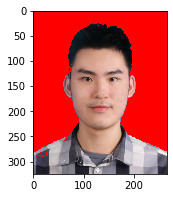

In [19]:
for i in range(rows):
    for j in range(cols):
        if fixed_mask[i,j]==255:
            img[i,j]=(0,0,255)#img is still BGR channel
my_show(img)

# The following is work done by other classmates:  (Haven't appreciate yet)

In [21]:
img=cv2.imread('Herman.jpg')
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

In [22]:
# 敏感度
sensitivity = 15
# 定义蓝色在hsv的范围
lower_blue = np.array([85-sensitivity,100,100])
upper_blue = np.array([85+sensitivity,255,255])
# 这里有个坑，HSV里蓝色H值是240，然后在cv2里H值减半是120，zhihu上代码按120+-来做本来是OK的。
# 但是我选的这个ID照片原始是湖蓝背景，转成hsv后，见上图，可以看到人脸及眼睛遮层变成蓝了，反而背景蓝偏绿了，我们的目的是要把背景换掉，因此
# 用zhihu这个怎么扣都扣的人脸！！！因此找了个colorPicker的工具看了下hsv图里现在这个蓝绿背景的H值，改成85后，背景和人就顺利分开了
mask_blue = cv2.inRange(img_hsv,lower_blue,upper_blue)

# 这一段算完是把背景和前景分开了，（5，5）是平滑度，更小的话，可以分的更细腻，为什么这么算就看懂
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
mask_blue = cv2.morphologyEx(mask_blue, cv2.MORPH_CLOSE, kernel)  # 闭运算
mask_blue = cv2.morphologyEx(mask_blue, cv2.MORPH_OPEN, kernel)   # 开运算
# 算完背景是黑255，前景是白0
print(mask_blue)
# cv2.imshow('aaa',mask_blue)
# if cv2.waitKey(0)==27:
#     cv2.destroyAllWindows()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
H,S,V = cv2.split(img_hsv)
print(H[0][0])

103


In [24]:
new_mask_blue = mask_blue
new_mask_blue[new_mask_blue==255] = 25
print(new_mask_blue)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
def img_bgColorChange(img,mask,destColorH):
    H,S,V = cv2.split(img)
    print(mask)
    mask[mask==255] = destColorH
    # H[(bg-sensitivity)<H<(bg+sensitivity)]=destColorH
    print(mask)
    H=H+mask
    print(H)
    return cv2.merge((H,S,V))
#     print(H)
#     H=H+mask_blue
#     print(H)
#     H[H>255] = (H[H>255]-255-(srcColorH-destColorH)).astype(img.dtype)


In [26]:
new_img_hsv = img_bgColorChange(img_hsv,mask_blue,40)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[103 103 103 ... 101 101 101]
 [103 103 103 ... 101 101 101]
 [103 103 103 ... 102 102 102]
 ...
 [130 130 130 ... 127 127 127]
 [130 130 130 ... 127 127 127]
 [130 130 130 ... 127 127 127]]


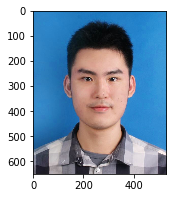

In [28]:
my_show_HSV(new_img_hsv)

In [29]:
new_mask_blue = mask_blue
new_mask_blue[new_mask_blue==255] = 25
print(new_mask_blue)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


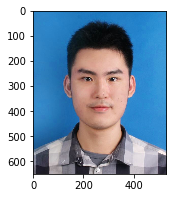

In [31]:

H,S,V = cv2.split(img_hsv)
H = H +new_mask_blue
my_show_HSV(cv2.merge((H,S,V)))